In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [9]:
DATADIR = "/home/gtx/GitHub/Deep-Learning/Cnn-Projects/CatAndDogdClassifier/PetImages"
CATEGORIES = ["Dog","Cat"]

In [ ]:
#testing

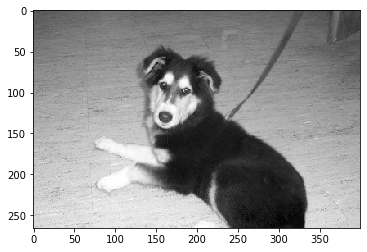

In [11]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [12]:
print(img_array.shape)

(266, 400)


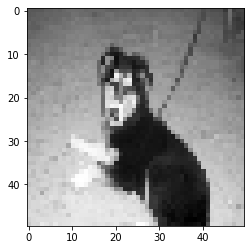

In [15]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [16]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 12501/12501 [00:09<00:00, 1288.65it/s]


In [17]:
print(len(training_data))


24946


In [18]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:1]:
    print(sample[0]) # index 0 has image and index 1 has label in the list

[[183 195 200 ... 203 194 185]
 [192 200 205 ... 207 199 190]
 [198 204 210 ... 210 203 196]
 ...
 [ 96  90  90 ...  68  33  34]
 [ 82  75  79 ...  64  49  30]
 [ 72  67  67 ...  74  74  41]]


In [21]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [22]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # -1 is important to understand since model 
                                                    #takes a matrix as 1x1 atleast and out lists are e.g. [100,]
                                                    #reshape turns them in [100,1] i.e. 100 rows on images through 1 colmn

[[[[183]
   [195]
   [200]
   ...
   [203]
   [194]
   [185]]

  [[192]
   [200]
   [205]
   ...
   [207]
   [199]
   [190]]

  [[198]
   [204]
   [210]
   ...
   [210]
   [203]
   [196]]

  ...

  [[ 96]
   [ 90]
   [ 90]
   ...
   [ 68]
   [ 33]
   [ 34]]

  [[ 82]
   [ 75]
   [ 79]
   ...
   [ 64]
   [ 49]
   [ 30]]

  [[ 72]
   [ 67]
   [ 67]
   ...
   [ 74]
   [ 74]
   [ 41]]]]


In [23]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()
#############3

model.add(Conv2D(filters=64,kernel_size=2, padding='same', activation='relu', 
                 input_shape=X.shape[1:]))  # drop 1st index to drop the length of dataset column (24946, 50, 50, 1)
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
#############
# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/home/gtx/anaconda3/envs/tfgpu1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gtx/anaconda3/envs/tfgpu1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gtx/anaconda3/envs/tfgpu1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gtx/anaconda3/envs/tfgpu1/lib/python3.6/site-pack

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 256)         0         
__________

In [31]:
from tensorflow.keras.layers import GlobalAveragePooling2D  # plain from keras.layers != from tensorflow.keras.layers<


# total params are too many we can trim them with global avg pooling

In [33]:
model = Sequential()
#############3

model.add(Conv2D(filters=64,kernel_size=2, padding='same', activation='relu', 
                 input_shape=X.shape[1:]))  # drop 1st index to drop the length of dataset column (24946, 50, 50, 1)
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D(input_shape=(6,6,256)))
model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 50, 64)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 128)       32896     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 256)       131328    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 256)         0         
__________

In [34]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)


Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 20s 1ms/step - loss: 0.6679 - acc: 0.5927 - val_loss: 0.6485 - val_acc: 0.6315
Epoch 2/3
17462/17462 [==============================] - 6s 369us/step - loss: 0.6415 - acc: 0.6314 - val_loss: 0.6388 - val_acc: 0.6332
Epoch 3/3
17462/17462 [==============================] - 6s 366us/step - loss: 0.6148 - acc: 0.6613 - val_loss: 0.5892 - val_acc: 0.6790
